In [2]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [4]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [5]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

def gaussian(x, mu, sig):
    """
    a gaussian function
    """
    x = x/1000
    ans = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return ans

In [6]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1012 parallax measurements

In [7]:
# s/n of detection
(1.32587877)/0.414193189


3.201111957444573

In [8]:
# parallax distance measurement from pulsar timing
pxPTA = 0.91650432571114162888
pxPTAerr =  0.20031527835021703532

In [9]:
# IPTA distance
dist_1012_ipta = norm(700, 200)

In [10]:
# Pb dot distance estimate
dist_px1012_pbdot = norm(1200, 200)

In [11]:
# IPTA distance measurement
ptaDist = 700 #pc
ptaDistErr = 200 #pc

In [12]:
1/4

0.25

In [13]:
pxmax = .3
pxmin = 4
gx = np.linspace(pxmax, pxmin, 1000)

In [14]:
dx = np.linspace(250, 2800,1000)

In [15]:
# Bailer-Jones distance estimate
bj_1012 = []
for r in dx:
    bj_1012.append(pOfR(r,1.3259, 0.4142,0.3575835102))

In [16]:
#areaT = trapz(valR16, dx) # are curves really normalized to 1?
#areaPTA = simps(valPTA, dx)
#areaSDR2 = simps(valGDR2, dx)
areaBJ = simps(bj_1012,dx)

In [17]:
combo = dist_1012_ipta.pdf(dx)*np.array(bj_1012)*dist_px1012_pbdot.pdf(dx)

In [18]:
normCombo = simps(combo, dx)

In [19]:
normCombo 

1.411586429812258e-05

In [20]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1012 = 411
eplus_DM_NE_1012 = 59
eminus_DM_NE_1012 = 56

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1012 = 804.5 # no errors reported here...

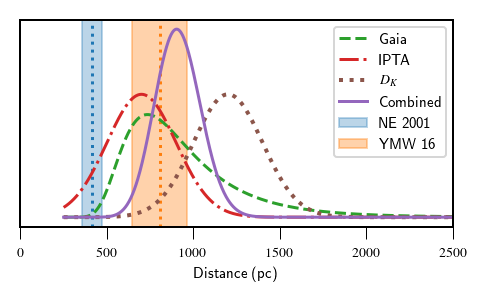

In [32]:
fig, ax1 = plt.subplots()
# DM NE 2001 model
ax1.axvspan(d_DM_NE_1012 - eminus_DM_NE_1012, d_DM_NE_1012+ eplus_DM_NE_1012, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0",linestyle =':')

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012*.8, d_DM_YMW_1012*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1012, ymin=0, ymax=1, color = "C1", linestyle =':')

#Direct distance measurements
plt.plot(dx, np.array(bj_1012)/areaBJ, label = "Gaia", color = "C2", linestyle='dashed')
plt.plot(dx, dist_1012_ipta.pdf(dx), label = r"IPTA", color = "C3", linestyle='-.')
plt.plot(dx, dist_px1012_pbdot.pdf(dx), label = r"$D_K$", color = "C5", linestyle='dotted', linewidth=2.0)
plt.plot(dx, combo/normCombo, label = "Combined", color = "C4", linestyle='solid')
#ax.axvline(x=(popt[1]), color = 'black')


plt.yticks([])
plt.xlim(0,2500)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("combinedPDFs_1012wDM_WNG.pdf")

In [22]:
#newx = (1/gx)[50:400]
#newy = (combo/normCombo)[50:400]
newx = (dx/1000)
newy = (np.array(bj_1012)/areaBJ)

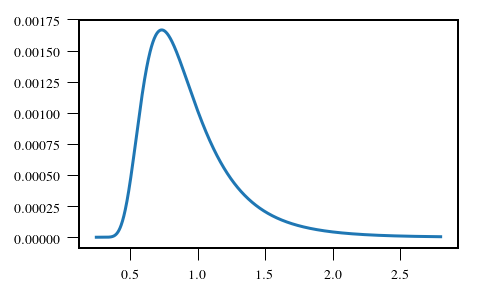

In [23]:
plt.plot(newx, newy)

In [24]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y

In [25]:
p_initial = [1.0, 1.0, 0.1, 0.0]


In [26]:
popt, pcov = curve_fit(gauss, newx, newy, p0=p_initial)

In [27]:
y_fit = gauss(newx, *popt)

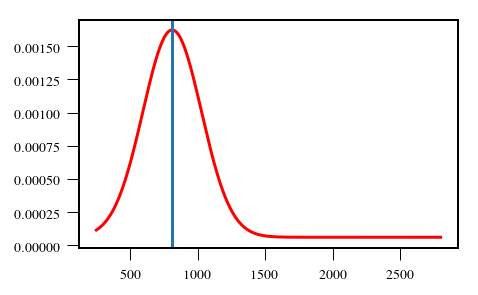

In [28]:
fig, ax = plt.subplots()
ax.plot(newx*1000, y_fit, color = 'red')
ax.axvline(x=(popt[1]*1000))

#plt.plot(dx, combo/normCombo  , label = "Combined", color = "C0", linestyle='solid')
#plt.plot(dx, combo/normCombo, label = "Combined", color = "C2", linestyle='solid')



In [29]:
popt,

(array([1.56060270e-03, 8.11833193e-01, 2.16765280e-01, 6.11269298e-05]),)

In [30]:
popt[1]*1000
#popt[2]*1000


811.8331930447926

In [31]:
popt[2]*1000

216.76527996479075